In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [37]:
df=pd.read_csv('/Users/mac/Downloads/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [38]:
df.rename(columns={'Income composition of resources':'HDI'},inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,HDI,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [39]:
df=df[['HDI','Adult Mortality']]
df.dropna(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 2937
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI              2768 non-null   float64
 1   Adult Mortality  2768 non-null   float64
dtypes: float64(2)
memory usage: 64.9 KB


/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2280/1368800586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Text(0, 0.5, 'Adult Mortality')

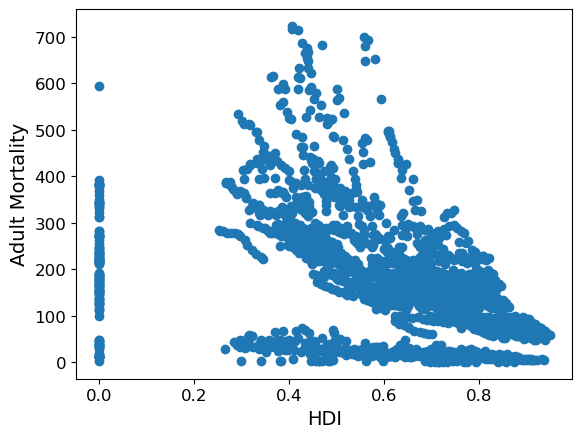

In [40]:
plt.scatter(df['HDI'],df['Adult Mortality'])
plt.xlabel('HDI')
plt.ylabel('Adult Mortality')

In [41]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
y_predicted


array([1, 1, 1, ..., 0, 2, 2], dtype=int32)

In [42]:
df['cluster']=y_predicted
df

/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2280/3711379308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


,HDI,Adult Mortality,cluster
0,0.479,263.0,1
1,0.476,271.0,1
2,0.470,268.0,1
3,0.463,272.0,1
4,0.454,275.0,1
...,...,...,...
2933,0.407,723.0,2
2934,0.418,715.0,2
2935,0.427,73.0,0
2936,0.427,686.0,2


In [43]:
km.cluster_centers_


array([[  0.72516983,  61.88540808],
       [  0.5839025 , 197.91700242],
       [  0.42178662, 415.97770701]])

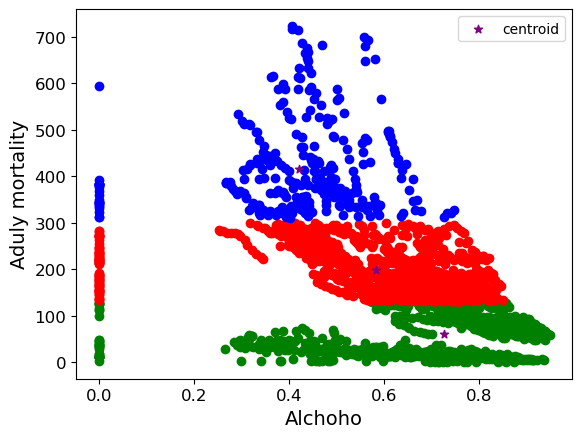

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['HDI'],df1['Adult Mortality'],color='green')
plt.scatter(df2['HDI'],df2['Adult Mortality'],color='red')
plt.scatter(df3['HDI'],df3['Adult Mortality'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Alchoho')
plt.ylabel('Aduly mortality')
plt.legend()


In [45]:
scaler = MinMaxScaler()

scaler.fit(df[['Adult Mortality']])
df['Adult Mortality'] = scaler.transform(df[['Adult Mortality']])

scaler.fit(df[['HDI']])
df['HDI'] = scaler.transform(df[['HDI']])

/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2280/4072071504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adult Mortality'] = scaler.transform(df[['Adult Mortality']])
/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2280/4072071504.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HDI'] = scaler.transform(df[['HDI']])


In [46]:
df.head()

,HDI,Adult Mortality,cluster
0,0.505274,0.362881,1
1,0.502110,0.373961,1
2,0.495781,0.369806,1
3,0.488397,0.375346,1
4,0.478903,0.379501,1


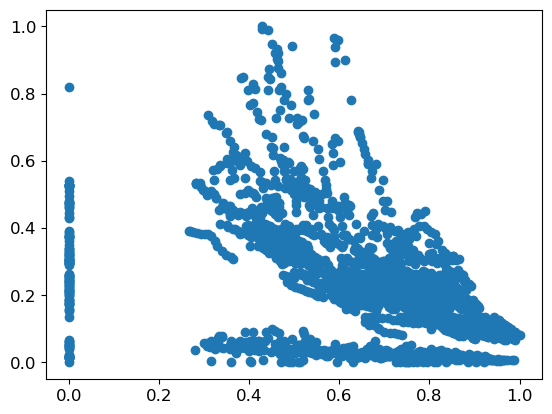

In [47]:
plt.scatter(df.HDI,df['Adult Mortality'])


In [48]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
y_predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [49]:
df['cluster']=y_predicted
df.head()

/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2280/4151433828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


,HDI,Adult Mortality,cluster
0,0.505274,0.362881,0
1,0.502110,0.373961,0
2,0.495781,0.369806,0
3,0.488397,0.375346,0
4,0.478903,0.379501,0


In [50]:
km.cluster_centers_

array([[0.49528712, 0.44114267],
       [0.77791884, 0.14663116],
       [0.11608452, 0.19740916]])

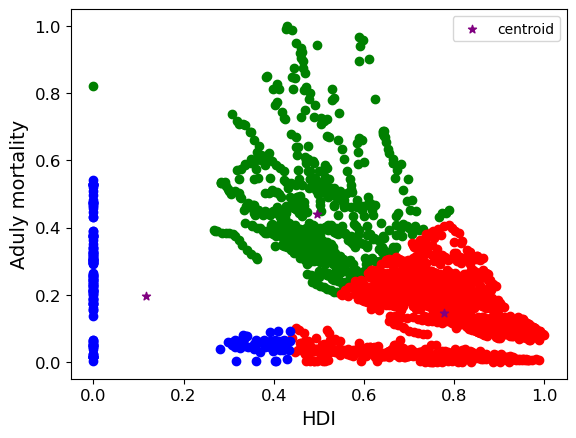

In [51]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['HDI'],df1['Adult Mortality'],color='green')
plt.scatter(df2['HDI'],df2['Adult Mortality'],color='red')
plt.scatter(df3['HDI'],df3['Adult Mortality'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('HDI')
plt.ylabel('Aduly mortality')
plt.legend()


In [52]:
sse=[]
k_range=range(1,20)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['HDI','Adult Mortality']])
    sse.append(km.inertia_)

In [53]:
sse

[217.29218633914618,
 101.48460752648596,
 72.49058941557223,
 50.65494097684508,
 38.307813898807936,
 28.98439211734818,
 24.711665039685585,
 20.653055523229128,
 18.209597296310655,
 16.255330141875874,
 14.5038609097099,
 13.008327596931107,
 11.952088450361074,
 10.856578279518137,
 10.106219082444856,
 9.334638014206524,
 8.740569610202112,
 8.044756591605392,
 7.489793617468661]

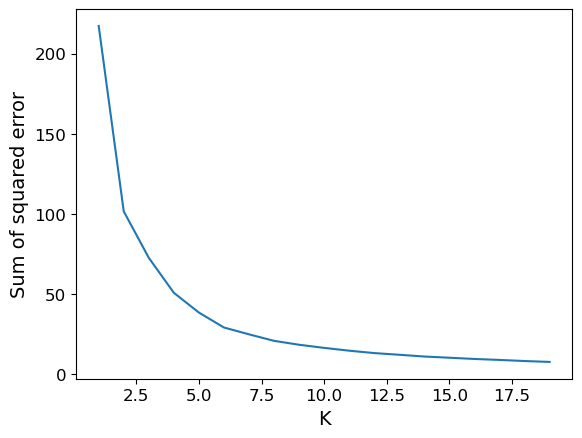

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)


In [55]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
df['cluster']=y_predicted
km.cluster_centers_

/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2280/2992966442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


array([[0.63504747, 0.20546226],
       [0.84742367, 0.11688332],
       [0.00439522, 0.2640183 ],
       [0.46850944, 0.48566852]])

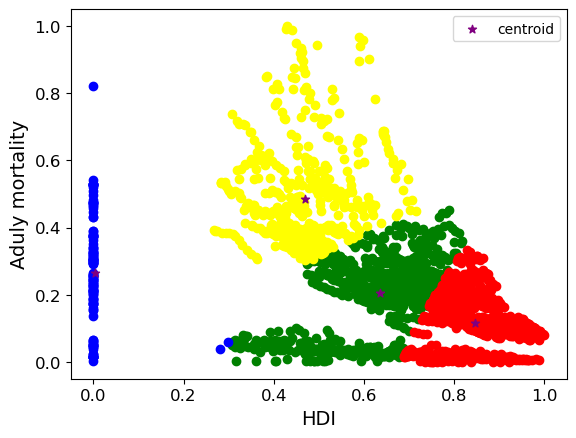

In [56]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1['HDI'],df1['Adult Mortality'],color='green')
plt.scatter(df2['HDI'],df2['Adult Mortality'],color='red')
plt.scatter(df3['HDI'],df3['Adult Mortality'],color='blue')
plt.scatter(df4['HDI'],df4['Adult Mortality'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('HDI')
plt.ylabel('Aduly mortality')
plt.legend()

In [57]:
from sklearn.metrics import silhouette_score


In [61]:
X = np.asarray(df, dtype=np.float32)
X

array([[0.50527424, 0.3628809 , 3.        ],
       [0.5021097 , 0.3739612 , 3.        ],
       [0.4957806 , 0.36980608, 3.        ],
       ...,
       [0.45042193, 0.09972299, 0.        ],
       [0.45042193, 0.9487535 , 3.        ],
       [0.4578059 , 0.9196676 , 3.        ]], dtype=float32)

In [62]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [63]:
y_pred


array([1, 1, 1, ..., 4, 1, 1], dtype=int32)

In [64]:
y_pred is kmeans.labels_


True

In [65]:
kmeans.cluster_centers_


array([[ 8.47423673e-01,  1.16883315e-01,  1.00000000e+00],
       [ 4.68509436e-01,  4.85668480e-01,  2.99999857e+00],
       [ 6.68748379e-01,  2.50714570e-01, -8.34465027e-07],
       [ 4.39518690e-03,  2.64018297e-01,  2.00000000e+00],
       [ 5.11695564e-01,  3.98300290e-02,  1.19209290e-07]], dtype=float32)

In [66]:
kmeans.labels_


array([1, 1, 1, ..., 4, 1, 1], dtype=int32)

In [67]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


In [68]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [69]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


In [70]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3, min_samples=4)

In [71]:
X = df.iloc[:, [0, 1]].values
X

array([[0.50527426, 0.36288089],
       [0.5021097 , 0.37396122],
       [0.49578059, 0.36980609],
       ...,
       [0.45042194, 0.09972299],
       [0.45042194, 0.94875346],
       [0.45780591, 0.91966759]])

In [72]:
model=dbscan.fit(X)


In [73]:
labels=model.labels_


In [74]:
from sklearn import metrics


In [75]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True


In [76]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)


In [78]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


In [79]:
dbscan2 = DBSCAN(eps=3,min_samples=5)
#eps distance, min_sample number of neigbour point to consider core point
dbscan2.fit(X)


DBSCAN(eps=3)

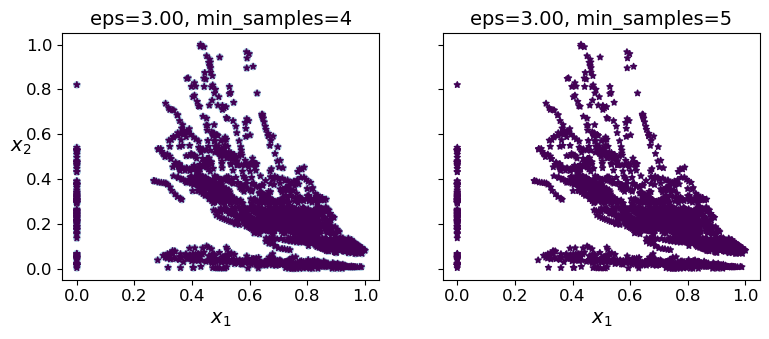

In [80]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=20)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=10, show_ylabels=False)


plt.show()


In [81]:
X = df.iloc[:, [0, 1]].values
X

array([[0.50527426, 0.36288089],
       [0.5021097 , 0.37396122],
       [0.49578059, 0.36980609],
       ...,
       [0.45042194, 0.09972299],
       [0.45042194, 0.94875346],
       [0.45780591, 0.91966759]])

In [82]:
y = df.iloc[:,2].values
y

array([3, 3, 3, ..., 0, 3, 3], dtype=int32)

In [83]:
from sklearn.mixture import GaussianMixture

n_range = range(2,11)


In [84]:
bic_score = []
aic_score = []

In [85]:
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(X)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(X))
    aic_score.append(gm.aic(X))

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

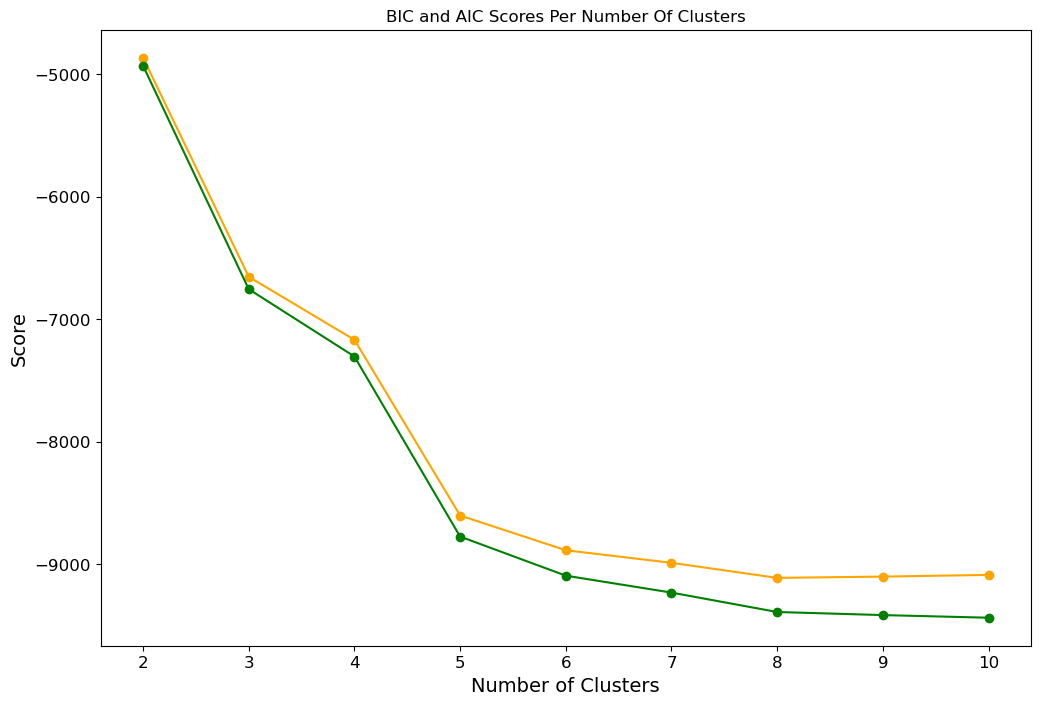

In [86]:
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')


In [87]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)


/Users/mac/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.13, 0.16, 0.13, 0.04, 0.05, 0.24, 0.09, 0.13, 0.04, 0.  ])